In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
##Lets create synthetic datapoints
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000,n_classes=2,n_features=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
X

array([[ 0.66539732, -0.41550897],
       [-0.6936805 ,  0.83898995],
       [ 0.02082231,  2.47231776],
       ...,
       [-2.09567729,  1.53941864],
       [-2.15437198, -2.78189203],
       [ 0.97010041,  0.99500008]])

In [5]:
y

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,

<AxesSubplot: xlabel='0', ylabel='1'>

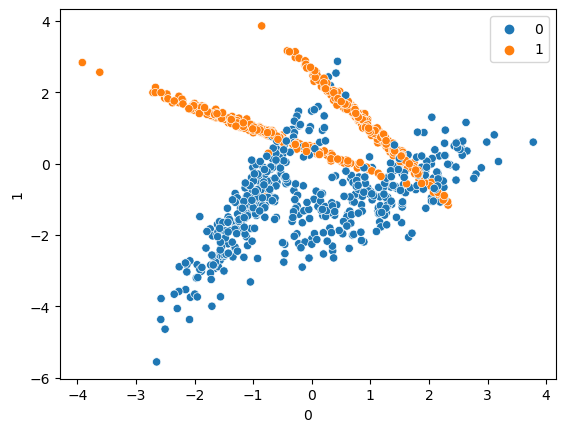

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [8]:
from sklearn.svm import SVC

In [9]:
svc = SVC(kernel='linear')

In [10]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [11]:
svc.coef_

array([[0.08854438, 1.51051556]])

In [12]:
y_pred  = svc.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [14]:
accuracy_score(y_test,y_pred)

0.876

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       128
           1       0.83      0.93      0.88       122

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [16]:
confusion_matrix(y_pred,y_test)

array([[105,   8],
       [ 23, 114]])

## Hyperaparameter tuning with SVM

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
parameters = {
                "C" : [0.1,1,10,100,1000],
                "gamma" : [1,0.1,0.01,0.001,0.0001]
}


In [28]:
grid = GridSearchCV(svc,param_grid=parameters,cv=5,verbose=3)

In [29]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.867 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.860 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.847 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.873 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.887 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.867 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.860 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.847 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.873 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.887 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.867 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [21]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [22]:
y_pred = grid.predict(X_test)

In [23]:
accuracy_score(y_pred,y_test)

0.872

In [24]:
confusion_matrix(y_test,y_pred)

array([[104,  24],
       [  8, 114]])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       128
           1       0.83      0.93      0.88       122

    accuracy                           0.87       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.87      0.87       250

